# Analyzing NFL Stats with Python and Machine Learning

In this project, I explore NFL stats game data. I modelled game winners using Logistic Regression. I also discovered the most important team level statistics. 

The data is from Pro Football Reference.

## Setup and Data Processing

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Loading the dataset

<details>
    <summary style="display:list-item;"><b>Toggle for an overview of the variables in our dataset.</b></summary>

* `symbol`: team name abbreviation
* `team_name`: team name
* `result`: whether this team won (`W`), lost (`L`), or tied (`T`) for this game
* `1stD_offense`: First down conversions by the team's offense
* `TotYd_offense`: Total yards gained by the team's offense
* `PassY_offense`: Total passing yards gained by the team's offense
* `RushY_offense`: Total rushing yards gained by the team's offense
* `TO_offense`: Turnovers committed by the team's offense
* `1stD_defense`: First down conversions allowed by the team's defense
* `TotYd_defense`: Total yards allowed by the team's defense
* `PassY_defense`: Total passing yards allowed by the team's defense
* `RushY_defense`: Total rushing yards allowed by the team's defense
* `TO_defense`: Turnovers in favor of the defensive team

</details>

In [3]:
df = pd.read_csv("season_2021.csv")

df.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


### 2. Summarize outcomes

Next, we want to examine our outcome variable to find out how wins and losses are recorded.

In [4]:
df["result"].value_counts()

W    284
L    284
T      2
Name: result, dtype: int64

### 3. Encode the result labels

We have two problems with the `result` variable:
* The `T` group is very small, which can lead to issues with our model's performance.
* Our regression algorithm requires numeric values as the outcome, but ours is coded with letters.

We replace Ties and Losses with 0 and Wins with 1

In [5]:
result_encoder = {'result': {'W': 1, 'T': 0, 'L': 0}}

df.replace(result_encoder, inplace=True)

df["result"].value_counts()

0    286
1    284
Name: result, dtype: int64

### 4. Visualize the stats

Looking at the trends in wins with First Down as the statistic

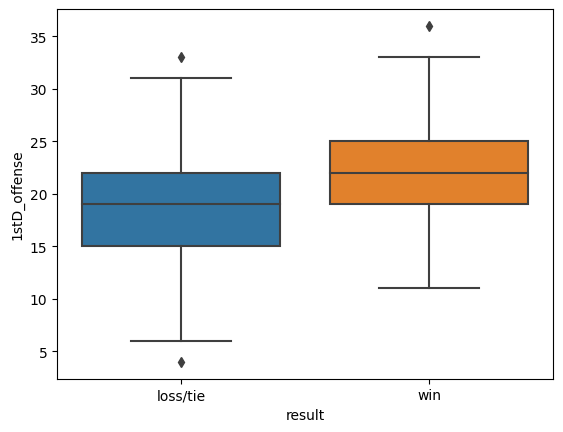

Index(['1stD_offense', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense',
       'RushY_defense', 'TO_defense'],
      dtype='object')


In [6]:
stat = '1stD_offense'

stat_plot = sns.boxplot(x="result", y=stat, data=df)

stat_plot.set_xticklabels(['loss/tie','win'])
plt.show()

print(df.columns[8:])

Learnings from this 

* First down conversions by the offense are typically between 12 and 33 in winning games (as depicted by the T-shaped ends of the plot). 
* The middle 50% of winning games appears to cover about 20 to 26 first down conversions (as depicted by the orange box).
* The middle line indicates a median of about 23 first down conversions by the winning team. 

## Data Preparation

### 5. Standardize features

Before running our regression, we need to prepare our data by standardizing all the game stats. 

Standardization is useful when the data has varying scales and the algorithm you are using does make assumptions about your data. Data standardization helps improve the quality of your data by transforming and standardizing it. This creates uniform scales for our data

I used StandardScaler for this dataset. StandardScaler will transform the data such that its distribution will have a mean value 0 and standard deviation of 1.

In [7]:

features = df.iloc[:,8:]
scaler = StandardScaler()

scaler.fit(features)

X = scaler.transform(features)

### 6. Save game outcomes

Let's also separate our game outcome variable for easier reference. Save the game outcomes as a variable called `y`.

In [8]:
y = df['result']

### 7. Split into training and testing data

We need to randomly split the data into two groups:
* **training data:** we'll use this data to train our model to recognize winning games from patterns in the game stats.
* **testing data:** we'll use this data to check our model's accuracy.

For now the `test_size` is set to 0.5. `random_state` is set to 42 for the entire project.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

We saved our training data as `X_train` (game stats) and `y_train` (game outcome) and our testing data as `X_test` (game stats) and `y_test` (game outcome).
    
One benefit of using the `train_test_split()` is that rows are selected at random throughout the dataset. This is important in-context because, had we not selected at random, we might bias our model to specific teams or to the early games of the season.
    
In this case, we are using a test size of 0.5, meaning half of our data will be used to train the model and half will be used to test the model's accuracy. We give `random_state` a number just to guarantee that anyone who runs this notebook will get the same random split that we did.

</details>

## Analysis

### 8. Run the model

In this step, we'll train our model to use the patterns of the offensive and defensive stats to predict the probability of a winning game.

The model we use is `Logistic Regression`

In [10]:
lrc = LogisticRegression()

lrc.fit(X_train, y_train)

LogisticRegression()

### 9. Check model accuracy

With our classifier fitted (trained) to the training data, we can use the trained classifier to make predictions on the test data. 

Now we can check the percentage of outcomes that our model predicted correctly. 

In [11]:
y_pred = lrc.predict(X_test)

accuracy_score(y_test, y_pred)

0.8280701754385965

#### The accuracy we got using this Logistic Regression model is 82.8%.

### 10. Optimize by tuning hyperparameters

We can improve our model performance by closely studying how different paremeters affect performance. Let's consider two hyperparameters for the `LogisticRegression` classifer: `penalty` and `C`.

* `penalty` imposes a regularization penalty on the model for having too many variables. Our options generally are `l1` and `l2` regularization.
* `C` is the inverse of regularization strength. It is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

The following code runs a logistic regression on our same data and gets an accuracy score for each combination of `penalty` and `C`. 

In [12]:
# create a list of penalties
penalties = ['l1', 'l2']
# create a list of values for C
C = [0.01, 0.1, 1.0, 10.0, 1000.0]

for penalty in penalties:
    for c in C:

        # instantiate the classifier
        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver='liblinear')

        # fit the classifier to the training data
        lrc_tuned.fit(X_train, y_train)
        
        # predict with the classifier using the .predict() function
        y_pred = lrc_tuned.predict(X_test)

        # view the model accuracy with the accuracy_score() function
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy*100,1)
        
        # print accuracy for each combination of penalty and C
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C = {c}')

Accuracy: 52.3% | penalty = l1, C = 0.01
Accuracy: 84.6% | penalty = l1, C = 0.1
Accuracy: 83.2% | penalty = l1, C = 1.0
Accuracy: 82.5% | penalty = l1, C = 10.0
Accuracy: 82.5% | penalty = l1, C = 1000.0
Accuracy: 80.4% | penalty = l2, C = 0.01
Accuracy: 83.5% | penalty = l2, C = 0.1
Accuracy: 82.8% | penalty = l2, C = 1.0
Accuracy: 82.5% | penalty = l2, C = 10.0
Accuracy: 82.5% | penalty = l2, C = 1000.0


#### We gained a small benefit by changing the hyperparameters to `penalty = l1` and `C = 0.1`. This brings us from 82.8% to 84.6% accuracy.

### 11. Optimize by changing test size

In the cell above, we see that sweeping our parameters did not yield much improvement in prediction accuracy. Let's try another method of parameter tuning: changing the test size of the train-test split. 

We started off with the test size being 0.5, now we change it to value between 0.20 and 0.35.

In [13]:
# optimal penalty and C
penalty = 'l1'
C = 0.1

# create a list of test_sizes
test_sizes = [val/100 for val in range(20,36)]

for test_size in test_sizes:

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # instantiate the classifier
    lrc_tts = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

    # fit the classifier to the training data
    lrc_tts.fit(X_train, y_train)

    # predict with the classifier using the .predict() function
    y_pred = lrc_tts.predict(X_test)

    # view the model accuracy with the accuracy_score() function
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rd = round(accuracy*100,1)
    
    # print accuracy for each combination of penalty and test size
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 87.7% | test size = 0.2
Accuracy: 87.5% | test size = 0.21
Accuracy: 87.3% | test size = 0.22
Accuracy: 87.9% | test size = 0.23
Accuracy: 88.3% | test size = 0.24
Accuracy: 88.8% | test size = 0.25
Accuracy: 87.9% | test size = 0.26
Accuracy: 88.3% | test size = 0.27
Accuracy: 88.1% | test size = 0.28
Accuracy: 88.6% | test size = 0.29
Accuracy: 87.1% | test size = 0.3
Accuracy: 87.6% | test size = 0.31
Accuracy: 86.9% | test size = 0.32
Accuracy: 87.3% | test size = 0.33
Accuracy: 86.1% | test size = 0.34
Accuracy: 86.0% | test size = 0.35


We were able to improve accuracy slightly with a test size of `0.25`. We improved from 84.6% correct predictions to 88.8% correct predictions. 

### 12. Save the optimized model

Now that we know which parameters optimize our model, we run and save the final model with our choices for `test_size`, `penalty`, and `C`. 

We are using `test_size = 0.25`, `penalty = 'l1'`, and `C = 0.1` as our optimal model parameters

By fine-tuning the hyperparameters we went from an accuracy of 82.8% to 88.8%. A 6% jump is pretty good.



In [18]:
test_size = 0.25
penalty = "l1"
C = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

optLr = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

optLr.fit(X_train, y_train)

y_pred = optLr.predict(X_test)
print(f'{accuracy_score(y_pred, y_test)*100:.2f}%')

88.81%


### 13. Examine feature importance

We see which features are the most important variables to make predictions

In [ ]:
importance = abs(optLr.coef_[0])

for i,v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')

#### Here's the feature importance

* Feature: 1stD_offense, Score: 0.08
* Feature: TotYd_offense, Score: 0.56
* Feature: PassY_offense, Score: 0.0
* Feature: RushY_offense, Score: 0.13
* Feature: TO_offense, Score: 0.75
* Feature: 1stD_defense, Score: 0.19
* Feature: TotYd_defense, Score: 0.6
* Feature: PassY_defense, Score: 0.0
* Feature: RushY_defense, Score: 0.21
* Feature: TO_defense, Score: 0.75

##### TO_offense and TO_defense are the 2 most important features by far

# Conclusion

This is the end of this NFL Machine Learning and Data Science case-study project. 